In [1]:
# Libraries use 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from datetime import datetime
from helper import find_missing
import geopandas as gpd
from pyproj import CRS
import folium
from folium.plugins import MarkerCluster

%matplotlib inline
figure(figsize=(10, 8), dpi=80)

# Reading dataset 
df_listings = pd.read_csv('./data/nyclistings.csv', low_memory=False)
df_listings.head()

id                        listing_url       scrape_id last_scraped  \
0  2595  https://www.airbnb.com/rooms/2595  20211204143024   2021-12-05   
1  3831  https://www.airbnb.com/rooms/3831  20211204143024   2021-12-05   
2  5121  https://www.airbnb.com/rooms/5121  20211204143024   2021-12-05   
3  5136  https://www.airbnb.com/rooms/5136  20211204143024   2021-12-05   
4  5178  https://www.airbnb.com/rooms/5178  20211204143024   2021-12-05   

                                                name  \
0                              Skylit Midtown Castle   
1  Whole flr w/private bdrm, bath & kitchen(pls r...   
2                                    BlissArtsSpace!   
3           Spacious Brooklyn Duplex, Patio + Garden   
4                   Large Furnished Room Near B'way　   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2  <b>The space</b><br />HELLO EVERYONE AND THANK...   
3  We welcome you to stay in our lovely 2 br dupl...   
4  Please don’t expect the luxury here just a bas...   

                               neighborhood_overview  \
0  Centrally located in the heart of Manhattan ju...   
1  Just the right mix of urban center and local n...   
2                                                NaN   
3                                                NaN   
4    Theater district, many restaurants around here.   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/f0813a11-40b2...     2845   
1  https://a0.muscache.com/pictures/e49999c2-9fd5...     4869   
2  https://a0.muscache.com/pictures/2090980c-b68e...     7356   
3  https://a0.muscache.com/pictures/miso/Hosting-...     7378   
4  https://a0.muscache.com/pictures/12065/f070997...     8967   

                                 host_url  ... review_scores_communication  \
0  https://www.airbnb.com/users/show/2845  ...                        4.79   
1  https://www.airbnb.com/users/show/4869  ...                        4.80   
2  https://www.airbnb.com/users/show/7356  ...                        4.91   
3  https://www.airbnb.com/users/show/7378  ...                        5.00   
4  https://www.airbnb.com/users/show/8967  ...                        4.42   

  review_scores_location review_scores_value license instant_bookable  \
0                   4.86                4.41     NaN                f   
1                   4.71                4.64     NaN                f   
2                   4.47                4.52     NaN                f   
3                   4.50                5.00     NaN                f   
4                   4.87                4.36     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              3                                           3   
1                              1                                           1   
2                              2                                           0   
3                              1                                           1   
4                              1                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            2   
3                                            0   
4                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.33  
1                                           0              4.86  
2                                           0              0.52  
3                                           0              0.02  
4                                           0              3.68  

[5 rows x 74 columns]

<Figure size 800x640 with 0 Axes>

In [2]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38277 entries, 0 to 38276
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            38277 non-null  int64  
 1   listing_url                                   38277 non-null  object 
 2   scrape_id                                     38277 non-null  int64  
 3   last_scraped                                  38277 non-null  object 
 4   name                                          38264 non-null  object 
 5   description                                   37085 non-null  object 
 6   neighborhood_overview                         22650 non-null  object 
 7   picture_url                                   38277 non-null  object 
 8   host_id                                       38277 non-null  int64  
 9   host_url                                      38277 non-null 

## A. EDA

### 1. Host

In [3]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [4]:
# find all the columns containing "host"
host_cols = [col for col in df_listings.columns if 'host' in col]
host_cols

['host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms']

There are 22 categories which have 'host' involved

In [5]:
find_missing(df_listings[host_cols])

Total Missing Instances  \
host_response_time                                              17193   
host_response_rate                                              17193   
host_acceptance_rate                                            16486   
host_about                                                      16149   
host_neighbourhood                                               7464   
host_location                                                     137   
host_is_superhost                                                  34   
host_identity_verified                                             34   
host_name                                                          34   
host_since                                                         34   
host_thumbnail_url                                                 34   
host_listings_count                                                34   
host_total_listings_count                                          34   
host_has_profile_pic                                               34   
host_picture_url                                                   34   
calculated_host_listings_count_private_rooms                        0   
calculated_host_listings_count                                      0   
calculated_host_listings_count_entire_homes                         0   
host_id                                                             0   
host_verifications                                                  0   
host_url                                                            0   
calculated_host_listings_count_shared_rooms                         0   

                                              % Missing  
host_response_time                            44.917313  
host_response_rate                            44.917313  
host_acceptance_rate                          43.070251  
host_about                                    42.189827  
host_neighbourhood                            19.499961  
host_location                                  0.357917  
host_is_superhost                              0.088826  
host_identity_verified                         0.088826  
host_name                                      0.088826  
host_since                                     0.088826  
host_thumbnail_url                             0.088826  
host_listings_count                            0.088826  
host_total_listings_count                      0.088826  
host_has_profile_pic                           0.088826  
host_picture_url                               0.088826  
calculated_host_listings_count_private_rooms   0.000000  
calculated_host_listings_count                 0.000000  
calculated_host_listings_count_entire_homes    0.000000  
host_id                                        0.000000  
host_verifications                             0.000000  
host_url                                       0.000000  
calculated_host_listings_count_shared_rooms    0.000000

Mean days as host: 2231.0
Median days as host: 2326.0


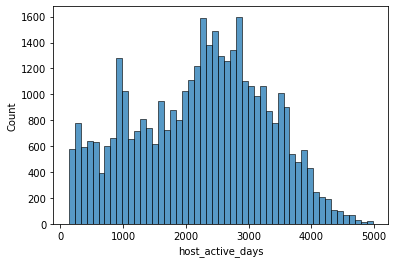

In [6]:
pd.options.mode.chained_assignment = None  # default='warn'

df_listings['host_since'] = pd.to_datetime(df_listings['host_since'])
df_listings['host_active_days'] = (datetime(2022, 4, 14) - df_listings.host_since).astype('timedelta64[D]')

print("Mean days as host:", round(df_listings['host_active_days'].mean(),0))
print("Median days as host:", df_listings['host_active_days'].median())

sns.histplot(df_listings['host_active_days']);

In [7]:
df_listings['host_response_time'].value_counts()

within an hour        11151
within a few hours     5326
within a day           3019
a few days or more     1588
Name: host_response_time, dtype: int64

In [8]:
df_listings['host_response_rate'].value_counts()

100%    13299
0%       1067
90%       792
99%       742
98%       526
        ...  
39%         1
4%          1
21%         1
45%         1
54%         1
Name: host_response_rate, Length: 88, dtype: int64

Source: https://www.airbnb.com/help/article/430/what-are-response-rate-and-response-time-and-how-are-they-calculated

### Response rate vs Response time based on Airbnb
- Response rate impacts Superhost status and search placement
- Response time has less impact on host status

Different calculation on response rate to become Superhost
https://www.airbnb.com/help/article/829/how-to-become-a-superhost


In [9]:
df_listings.host_response_rate = df_listings.host_response_rate.str[:-1].astype('float64')
df_listings.host_response_rate = pd.cut(df_listings.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)
df_listings.host_response_rate =df_listings.host_response_rate.astype('str')
df_listings.host_response_rate.replace('nan', 'unknown', inplace=True)
df_listings.host_response_rate.value_counts()

unknown    17193
100%       13299
50-89%      3049
90-99%      2925
0-49%       1811
Name: host_response_rate, dtype: int64

In [10]:
df_listings['host_response_time'].fillna('unknown', inplace=True)
df_listings['host_response_time'].value_counts()

unknown               17193
within an hour        11151
within a few hours     5326
within a day           3019
a few days or more     1588
Name: host_response_time, dtype: int64

In [11]:
df_listings['host_acceptance_rate'] = df_listings['host_acceptance_rate'].str[:-1].astype('float64')
df_listings.host_acceptance_rate = pd.cut(df_listings.host_acceptance_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)
df_listings.host_acceptance_rate =df_listings.host_acceptance_rate.astype('str')
df_listings.host_acceptance_rate.replace('nan', 'unknown', inplace=True)
df_listings.host_acceptance_rate.value_counts()

unknown    16486
50-89%      7261
90-99%      5375
100%        5342
0-49%       3813
Name: host_acceptance_rate, dtype: int64

In [12]:
df_listings['host_identity_verified'].value_counts()

t    31866
f     6377
Name: host_identity_verified, dtype: int64

In [13]:
df_listings['host_is_superhost'].value_counts()

f    30865
t     7378
Name: host_is_superhost, dtype: int64

In [14]:
df_listings['calculated_host_listings_count'].value_counts().head(10)


1      21932
2       4762
3       2220
4       1240
5        670
6        636
421      421
7        413
8        360
105      315
Name: calculated_host_listings_count, dtype: int64

In [15]:
df_listings['calculated_host_listings_count'].max()

421

In [16]:
df_listings['host_id'].value_counts().head(10)

305240193    421
107434423    308
158969505    201
3223938      180
51501835     177
137358866    162
334163301    160
19303369     142
200239515    110
204704622    108
Name: host_id, dtype: int64

In [17]:
top_host_listings_count = df_listings['host_id'].value_counts().head(10)
top_host_listings_df = pd.DataFrame(top_host_listings_count)
top_host_listings_df.reset_index(inplace=True)
top_host_listings_df.rename(columns={'index': 'host_id', 'host_id': 'count'}, inplace=True)
top_host_listings_df

host_id  count
0  305240193    421
1  107434423    308
2  158969505    201
3    3223938    180
4   51501835    177
5  137358866    162
6  334163301    160
7   19303369    142
8  200239515    110
9  204704622    108

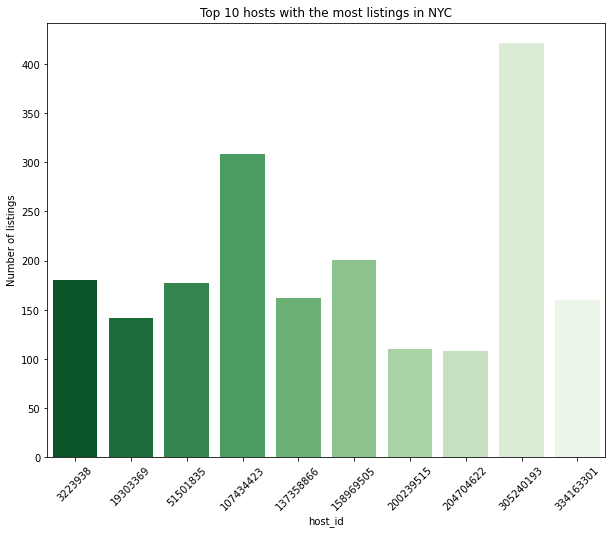

In [18]:
plt.figure(figsize=(10,8))
top_host_fig = sns.barplot(x='host_id',y='count', data=top_host_listings_df, palette='Greens_r')
top_host_fig.set_title('Top 10 hosts with the most listings in NYC')
top_host_fig.set_ylabel('Number of listings')
top_host_fig.set_xticklabels(top_host_fig.get_xticklabels(), rotation=45);

In [19]:
print(f"The first host joined on {min(df_listings['host_since']).strftime('%d %B %Y')}, and the most recent joined on {max(df_listings['host_since']).strftime('%d %B %Y')}.")

The first host joined on 22 August 2008, and the most recent joined on 02 December 2021.


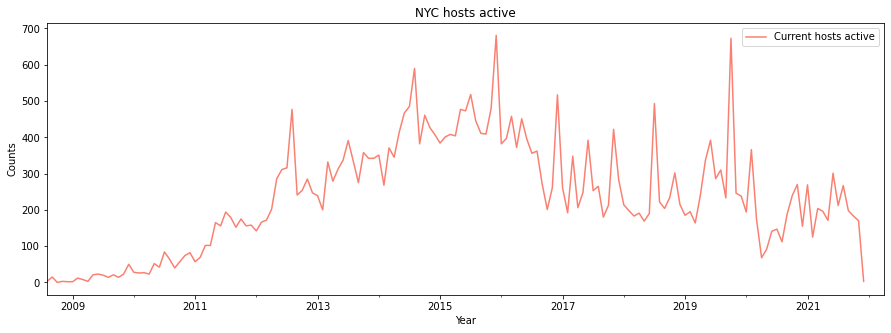

In [20]:
plt.figure(figsize=(15,5))
df_listings.set_index('host_since').resample('MS').size().plot(label='Current hosts active', color='salmon')
plt.title('NYC hosts active')
plt.legend()
plt.xlim('2008-08-01', '2022-04-17') 
plt.xlabel('Year')
plt.ylabel('Counts')
plt.savefig('./assets/current_host_active.png', dpi=300)
plt.show()

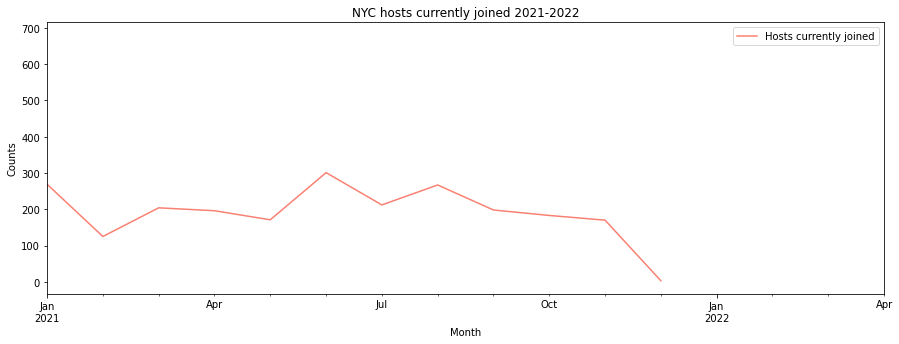

In [21]:
plt.figure(figsize=(15,5))
df_listings.set_index('host_since').resample('MS').size().plot(label='Hosts currently joined', color='salmon')
plt.title('NYC hosts currently joined 2021-2022')
plt.legend()
plt.xlim('2021-01-01', '2022-04-17') 
plt.xlabel('Month')
plt.ylabel('Counts')
plt.savefig('./assets/currently_joined_host.png', dpi=300)
plt.show()

In [22]:
print("Average number of listings per host per year in NYC:")
print(round(df_listings.set_index('host_since').host_listings_count.resample('YS').mean(),2))

Average number of listings per host per year in NYC:
host_since
2008-01-01      4.96
2009-01-01      2.18
2010-01-01      1.76
2011-01-01      2.31
2012-01-01     13.59
2013-01-01     66.83
2014-01-01     11.84
2015-01-01     20.19
2016-01-01    164.64
2017-01-01     16.05
2018-01-01    125.34
2019-01-01     29.65
2020-01-01     69.46
2021-01-01      9.14
Name: host_listings_count, dtype: float64


In [23]:
df_listings.dropna(subset=['host_is_superhost', 	
                        'host_identity_verified',
                        'host_name',
                        'host_since',
                        'host_thumbnail_url',
                        'host_listings_count',
                        'host_total_listings_count',
                        'host_has_profile_pic',
                        'host_picture_url'], inplace=True)

In [24]:
# List of the largest host_listings_count and the year the host joined Airbnb
df_listings.sort_values(by='host_listings_count').drop_duplicates('host_listings_count', keep='last').tail(10)[['host_since', 'host_listings_count']]

host_since  host_listings_count
36164 2015-03-30                404.0
31499 2020-10-26                451.0
12697 2015-04-14                512.0
4525  2015-04-07                653.0
25299 2015-11-02               1106.0
36088 2020-07-29               1185.0
28305 2020-09-23               2232.0
23106 2016-12-16               2273.0
30931 2013-03-25               3387.0
33858 2018-11-21               3750.0

### 2. Neighbourhoods

In [25]:
df_neighbourhoods = df_listings.filter(regex='neighbourhood')
df_neighbourhoods.head()

host_neighbourhood                      neighbourhood  \
0             Midtown            New York, United States   
1        Clinton Hill  Brooklyn, New York, United States   
2  Bedford-Stuyvesant                                NaN   
3   Greenwood Heights                                NaN   
4      Hell's Kitchen            New York, United States   

  neighbourhood_cleansed neighbourhood_group_cleansed  
0                Midtown                    Manhattan  
1     Bedford-Stuyvesant                     Brooklyn  
2     Bedford-Stuyvesant                     Brooklyn  
3            Sunset Park                     Brooklyn  
4                Midtown                    Manhattan

In [26]:
find_missing(df_neighbourhoods)

Total Missing Instances  % Missing
neighbourhood                                   15618  40.838846
host_neighbourhood                               7430  19.428392
neighbourhood_cleansed                              0   0.000000
neighbourhood_group_cleansed                        0   0.000000

In [27]:
df_listings['neighbourhood_group_cleansed'].value_counts()

Manhattan        16757
Brooklyn         14707
Queens            5322
Bronx             1104
Staten Island      353
Name: neighbourhood_group_cleansed, dtype: int64

In [28]:
df_listings['neighbourhood_cleansed'].value_counts()

Bedford-Stuyvesant    2821
Williamsburg          2600
Harlem                1968
Hell's Kitchen        1701
Bushwick              1692
                      ... 
Country Club             1
Castle Hill              1
Fort Wadsworth           1
Neponsit                 1
Graniteville             1
Name: neighbourhood_cleansed, Length: 222, dtype: int64

In [29]:
# Remove $ sign on 'price'
df_listings.price = df_listings.price.str[1:-3]
df_listings.price = df_listings.price.str.replace(",", "")
df_listings.price = df_listings.price.astype('float64')

In [30]:
# list price each neigh
neigh_m = df_listings.loc[df_listings['neighbourhood_group_cleansed'] == 'Manhattan']
price_m = neigh_m[['price']]

neigh_br = df_listings.loc[df_listings['neighbourhood_group_cleansed'] == 'Brooklyn']
price_br = df_listings[['price']]

neigh_q = df_listings.loc[df_listings['neighbourhood_group_cleansed'] == 'Queens']
price_q = df_listings[['price']]

neigh_brx = df_listings.loc[df_listings['neighbourhood_group_cleansed'] == 'Bronx']
price_brx = df_listings[['price']]

neigh_s = df_listings.loc[df_listings['neighbourhood_group_cleansed'] == 'Statent Island']
price_s = df_listings[['price']]

df_price_neigh = [price_m, price_br, price_q, price_brx, price_s]


In [31]:
neigh_list = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Statent Island']
price_neigh_list = []
for each in df_price_neigh:
    price_stats = each.describe(percentiles=[.25, .50, .75])
    price_stats = price_stats.iloc[3:]
    price_stats.reset_index(inplace=True)
    price_stats.rename(columns={'index':'Stats'}, inplace=True)
    price_neigh_list.append(price_stats)

price_neigh_list[0].rename(columns={'price':neigh_list[0]}, inplace=True)
price_neigh_list[1].rename(columns={'price':neigh_list[1]}, inplace=True)
price_neigh_list[2].rename(columns={'price':neigh_list[2]}, inplace=True)
price_neigh_list[3].rename(columns={'price':neigh_list[3]}, inplace=True)
price_neigh_list[4].rename(columns={'price':neigh_list[4]}, inplace=True)

In [32]:
df_price_neigh_stats = price_neigh_list
df_price_neigh_stats = [df.set_index('Stats') for df in df_price_neigh_stats]
df_price_neigh_stats = df_price_neigh_stats[0].join(df_price_neigh_stats[1:])
df_price_neigh_stats

Manhattan  Brooklyn   Queens    Bronx  Statent Island
Stats                                                       
min          0.0       0.0      0.0      0.0             0.0
25%         95.0      70.0     70.0     70.0            70.0
50%        150.0     114.0    114.0    114.0           114.0
75%        243.0     189.0    189.0    189.0           189.0
max      10000.0   10000.0  10000.0  10000.0         10000.0

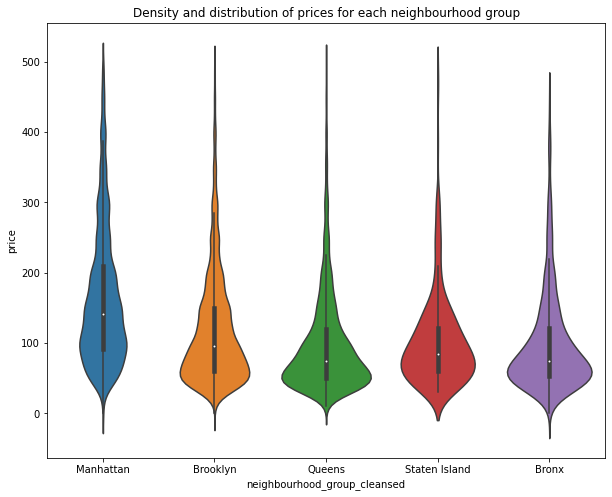

In [33]:
plt.figure(figsize=(10,8))
#remove extreme values
sub_price_neigh = df_listings[df_listings.price < 500]
fig_price_neigh = sns.violinplot(data=sub_price_neigh, x='neighbourhood_group_cleansed', y='price')
fig_price_neigh.set_title('Density and distribution of prices for each neighbourhood group');

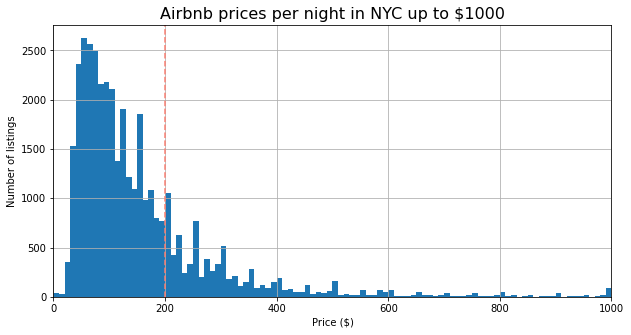

In [34]:
# Distribution of prices from $0 to $1000
plt.figure(figsize=(10,5))
df_listings.price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(200, color='salmon', linestyle='--')
plt.title("Airbnb prices per night in NYC up to $1000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

### 3. Accomodation

In [35]:
# top 10 property types
top_property = df_listings.property_type.value_counts().sort_values(ascending=False).head(10)
top_property

Entire rental unit                  16006
Private room in rental unit         11659
Private room in residential home     1978
Private room in townhouse            1180
Entire residential home              1143
Entire condominium (condo)           1139
Room in hotel                         658
Entire loft                           629
Entire townhouse                      577
Room in boutique hotel                487
Name: property_type, dtype: int64

In [36]:
top_property_df = pd.DataFrame(top_property)
top_property_df.reset_index(inplace=True)
top_property_df.rename(columns={'index': 'property_type', 'property_type': 'count'}, inplace=True)
top_property_df

property_type  count
0                Entire rental unit  16006
1       Private room in rental unit  11659
2  Private room in residential home   1978
3         Private room in townhouse   1180
4           Entire residential home   1143
5        Entire condominium (condo)   1139
6                     Room in hotel    658
7                       Entire loft    629
8                  Entire townhouse    577
9            Room in boutique hotel    487

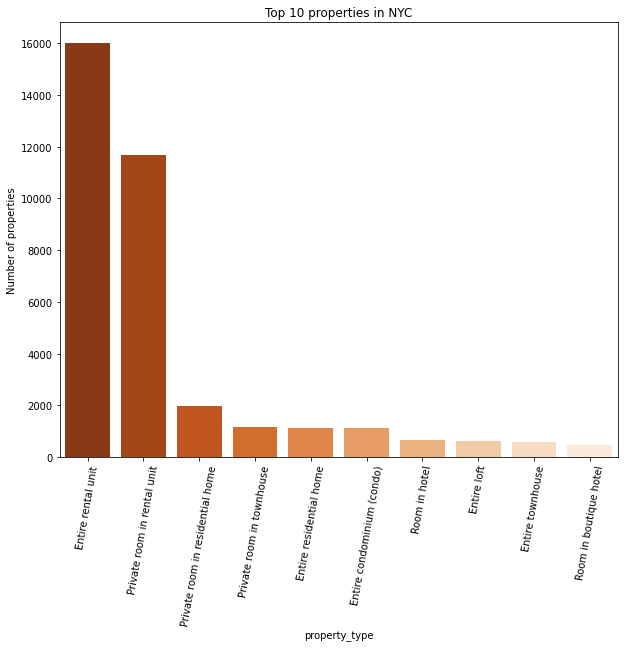

In [37]:
plt.figure(figsize=(10,8))
top_property_fig = sns.barplot(x='property_type',y='count', data=top_property_df, palette='Oranges_r')
top_property_fig.set_title('Top 10 properties in NYC')
top_property_fig.set_ylabel('Number of properties')
top_property_fig.set_xticklabels(top_property_fig.get_xticklabels(), rotation=80);

In [38]:
df_listings.room_type.value_counts()

Entire home/apt    20370
Private room       17091
Shared room          572
Hotel room           210
Name: room_type, dtype: int64

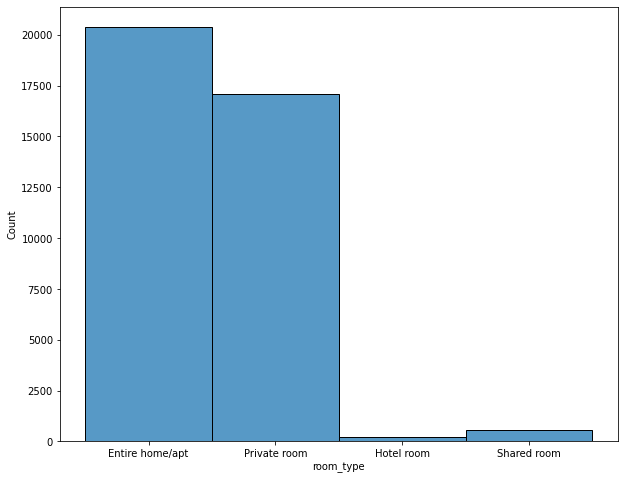

In [39]:
plt.figure(figsize=(10,8))
sns.histplot(data=df_listings, x='room_type');

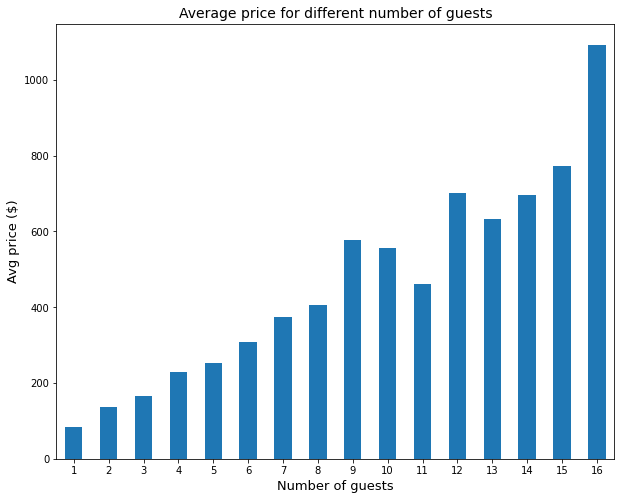

In [40]:
# #accomodates vs price
plt.figure(figsize=(10,8))
df_listings.groupby('accommodates').price.mean().plot(kind='bar')
plt.title('Average price for different number of guests', fontsize=14)
plt.xlabel('Number of guests', fontsize=13)
plt.ylabel('Avg price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

In [41]:
df_listings['bathrooms'].isnull().sum()

38243

In [42]:
df_listings.drop(columns='bathrooms', inplace=True)

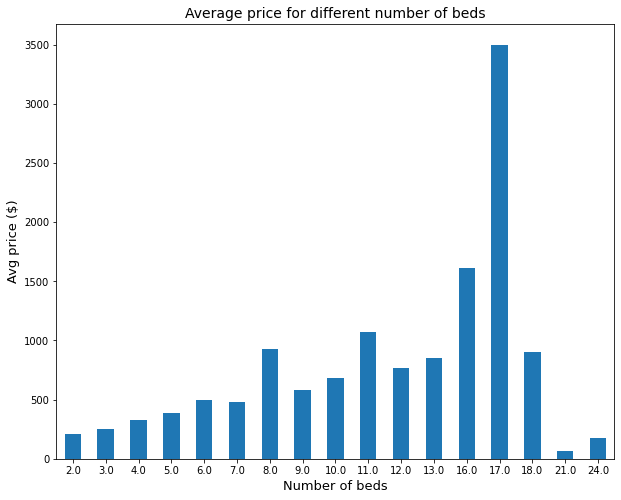

In [43]:
# #accomodates vs price
plt.figure(figsize=(10,8))
df_listings.groupby('beds').price.mean().plot(kind='bar')
plt.title('Average price for different number of beds', fontsize=14)
plt.xlabel('Number of beds', fontsize=13)
plt.ylabel('Avg price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

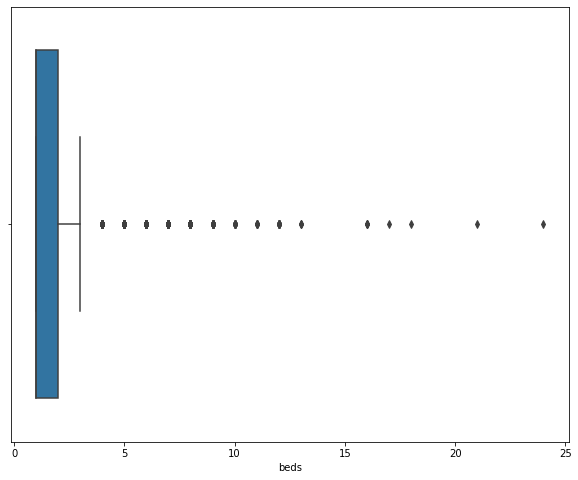

In [44]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_listings, x='beds');

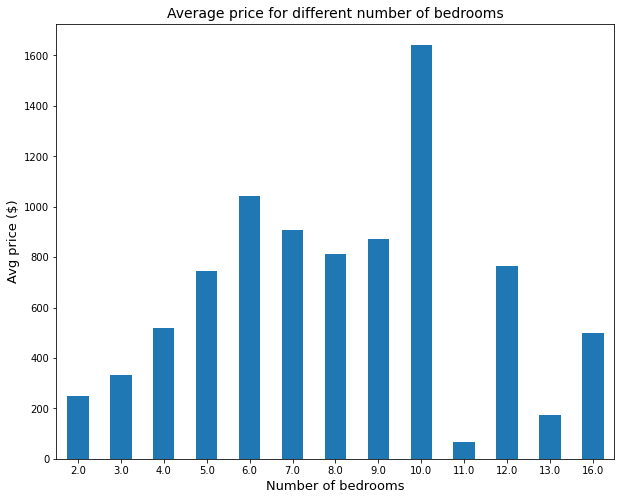

In [45]:
plt.figure(figsize=(10,8))
df_listings.groupby('bedrooms').price.mean().plot(kind='bar')
plt.title('Average price for different number of bedrooms', fontsize=14)
plt.xlabel('Number of bedrooms', fontsize=13)
plt.ylabel('Avg price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

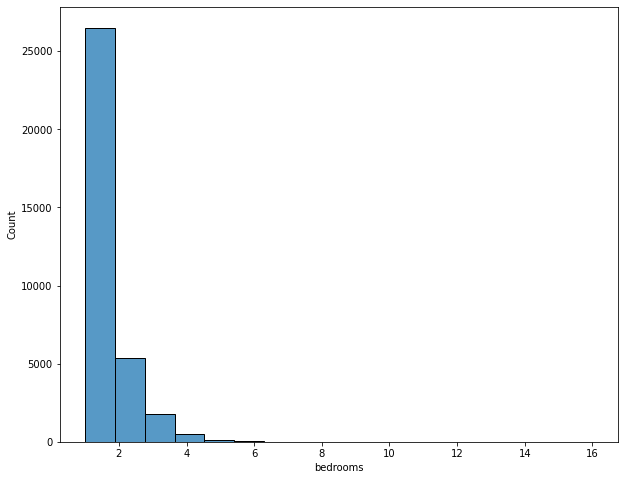

In [46]:
plt.figure(figsize=(10,8))
sns.histplot(data=df_listings, x='bedrooms');

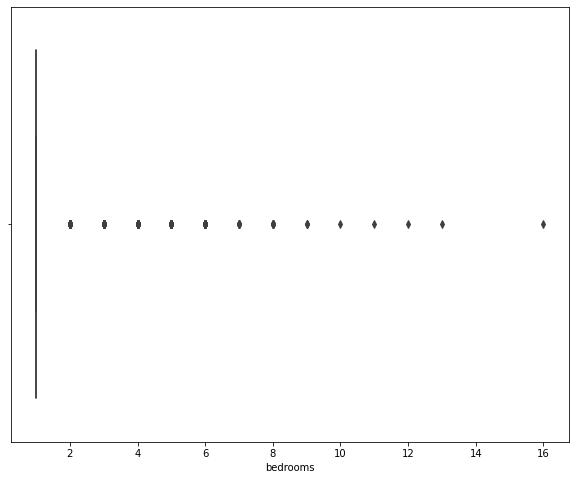

In [47]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_listings, x='bedrooms');

In [48]:
df_listings['amenities'][:1].values

array(['["Extra pillows and blankets", "Baking sheet", "Luggage dropoff allowed", "TV", "Hangers", "Ethernet connection", "Long term stays allowed", "Carbon monoxide alarm", "Wifi", "Heating", "Dishes and silverware", "Air conditioning", "Free street parking", "Essentials", "Hot water", "Bathtub", "Kitchen", "Fire extinguisher", "Cooking basics", "Dedicated workspace", "Hair dryer", "Stove", "Smoke alarm", "Keypad", "Iron", "Oven", "Paid parking off premises", "Refrigerator", "Bed linens", "Cleaning before checkout", "Coffee maker"]'],
      dtype=object)

In [49]:
# Cleaning amenities list by removing un-used symbols
amenities_list = list(df_listings.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('[', '')
amenities_list_string = amenities_list_string.replace(']', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 'The best only body soap',
 'bose sound system with aux',
 'samsung stainless steel gas stove',
 '32\\ TV with Netflix',
 '120\\ HDTV with Amazon Prime Video',
 'Gym nearby',
 'Depends on what I am using - sometimes low or high end conditioner',
 'General  body soap',
 'Mielle conditioner',
 'ge refrigerator',
 'Harman Kardon Bluetooth sound system',
 'VO5 (Pomegranate ) shampoo',
 '39\\ HDTV with Amazon Prime Video',
 'Bidet',
 'Brand new  oven',
 'Daylogic moisturizing body wash',
 'Large TRESemm\\u00e9\\u00ae pump shampoo for our guests.  shampoo',
 'Small sample to get your started  body soap',
 'Public Goods  body soap',
 'KitchenAid refrigerator',
 'travel kit body soap',
 'Bed sheets and pillows',
 'Full size gas stove with oven',
 'natural liquid body wash body soap',
 'Private pool',
 'Keypad',
 'Fast wifi \\u2013 440 Mbps',
 'Fast wifi \\u2013 208 Mbps',
 'Complimentary valet parking',
 'Fast wifi \\u2013 201 Mbps',
 'Onsite restaurant \\u2014 Blue Ribbon Kanpai Garden'

In [50]:
name_amenities = []
for each in amenities_set:
    name_amenities.append(each)

def split_amenities(name):
    split_str = str(name).split()
    return split_str

count_name_amenities = []
for i in name_amenities:
    for word in split_amenities(i):
        word = word.lower()
        count_name_amenities.append(word)

In [51]:
from collections import Counter

top_20 = Counter(count_name_amenities).most_common()
top_20 = top_20[:20]

In [52]:
sub_amenities_word = pd.DataFrame(top_20)
sub_amenities_word.rename(columns={0: 'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'soap'),
 Text(1, 0, 'body'),
 Text(2, 0, 'conditioner'),
 Text(3, 0, 'with'),
 Text(4, 0, 'shampoo'),
 Text(5, 0, 'sound'),
 Text(6, 0, 'system'),
 Text(7, 0, 'refrigerator'),
 Text(8, 0, 'stove'),
 Text(9, 0, '\\u2013'),
 Text(10, 0, 'bluetooth'),
 Text(11, 0, 'oven'),
 Text(12, 0, 'and'),
 Text(13, 0, 'stainless'),
 Text(14, 0, 'steel'),
 Text(15, 0, 'wifi'),
 Text(16, 0, 'hdtv'),
 Text(17, 0, 'mbps'),
 Text(18, 0, 'fast'),
 Text(19, 0, 'tv')]

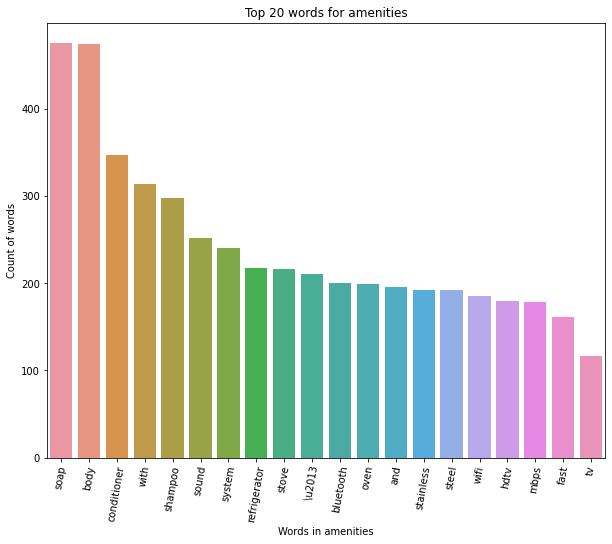

In [53]:
plt.figure(figsize=(10,8))
fig_name_amenities = sns.barplot(x='Words', y='Count', data=sub_amenities_word)
fig_name_amenities.set_title('Top 20 words for amenities')
fig_name_amenities.set_ylabel('Count of words')
fig_name_amenities.set_xlabel('Words in amenities')
fig_name_amenities.set_xticklabels(fig_name_amenities.get_xticklabels(), rotation=80)

In [54]:
name_set = df_listings['name'].values

In [55]:
name_listing = []
for each in name_set:
    name_listing.append(each)

def split_name(n):
    split_str = str(n).split()
    return split_str

count_name_listing = []
for i in name_listing:
    for word in split_name(i):
        word = word.lower()
        count_name_listing.append(word)

[Text(0, 0, 'in'),
 Text(1, 0, 'room'),
 Text(2, 0, 'bedroom'),
 Text(3, 0, 'private'),
 Text(4, 0, 'apartment'),
 Text(5, 0, 'cozy'),
 Text(6, 0, 'studio'),
 Text(7, 0, 'the'),
 Text(8, 0, 'to'),
 Text(9, 0, 'with'),
 Text(10, 0, '1'),
 Text(11, 0, 'brooklyn'),
 Text(12, 0, 'apt'),
 Text(13, 0, 'spacious'),
 Text(14, 0, '2'),
 Text(15, 0, '&'),
 Text(16, 0, 'of'),
 Text(17, 0, 'and'),
 Text(18, 0, 'manhattan'),
 Text(19, 0, 'east')]

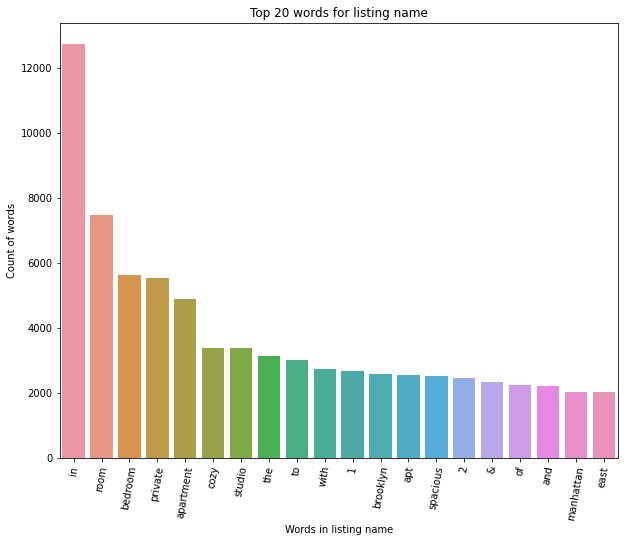

In [56]:
top_20 = Counter(count_name_listing).most_common()
top_20 = top_20[:20]
sub_name_word = pd.DataFrame(top_20)
sub_name_word.rename(columns={0: 'Words', 1:'Count'}, inplace=True)

plt.figure(figsize=(10,8))
fig_name_listing = sns.barplot(x='Words', y='Count', data=sub_name_word)
fig_name_listing.set_title('Top 20 words for listing name')
fig_name_listing.set_ylabel('Count of words')
fig_name_listing.set_xlabel('Words in listing name')
fig_name_listing.set_xticklabels(fig_name_listing.get_xticklabels(), rotation=80)

In [57]:
df_listings.minimum_nights.value_counts()

30     20690
1       5003
2       3769
3       2909
5       1137
       ...  
98         1
72         1
89         1
222        1
356        1
Name: minimum_nights, Length: 123, dtype: int64

In [58]:
# Estimate revenue of listings. Each review means that a booking is successful
# Assuming guests who left reviews stayed at least the minimum nights 
reviews = pd.read_csv('./data/reviews.csv')
reviews.head()

listing_id        date
0        2595  2009-11-21
1        2595  2009-12-05
2        2595  2009-12-10
3        2595  2010-04-09
4        2595  2010-05-25

In [59]:
df_listings.rename(columns={'id': 'listing_id'}, inplace=True)
df_bookings = pd.merge(df_listings, reviews, on='listing_id')
df_bookings.head()

listing_id                        listing_url       scrape_id last_scraped  \
0        2595  https://www.airbnb.com/rooms/2595  20211204143024   2021-12-05   
1        2595  https://www.airbnb.com/rooms/2595  20211204143024   2021-12-05   
2        2595  https://www.airbnb.com/rooms/2595  20211204143024   2021-12-05   
3        2595  https://www.airbnb.com/rooms/2595  20211204143024   2021-12-05   
4        2595  https://www.airbnb.com/rooms/2595  20211204143024   2021-12-05   

                    name                                        description  \
0  Skylit Midtown Castle  Beautiful, spacious skylit studio in the heart...   
1  Skylit Midtown Castle  Beautiful, spacious skylit studio in the heart...   
2  Skylit Midtown Castle  Beautiful, spacious skylit studio in the heart...   
3  Skylit Midtown Castle  Beautiful, spacious skylit studio in the heart...   
4  Skylit Midtown Castle  Beautiful, spacious skylit studio in the heart...   

                               neighborhood_overview  \
0  Centrally located in the heart of Manhattan ju...   
1  Centrally located in the heart of Manhattan ju...   
2  Centrally located in the heart of Manhattan ju...   
3  Centrally located in the heart of Manhattan ju...   
4  Centrally located in the heart of Manhattan ju...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/f0813a11-40b2...     2845   
1  https://a0.muscache.com/pictures/f0813a11-40b2...     2845   
2  https://a0.muscache.com/pictures/f0813a11-40b2...     2845   
3  https://a0.muscache.com/pictures/f0813a11-40b2...     2845   
4  https://a0.muscache.com/pictures/f0813a11-40b2...     2845   

                                 host_url  ... review_scores_value license  \
0  https://www.airbnb.com/users/show/2845  ...                4.41     NaN   
1  https://www.airbnb.com/users/show/2845  ...                4.41     NaN   
2  https://www.airbnb.com/users/show/2845  ...                4.41     NaN   
3  https://www.airbnb.com/users/show/2845  ...                4.41     NaN   
4  https://www.airbnb.com/users/show/2845  ...                4.41     NaN   

  instant_bookable calculated_host_listings_count  \
0                f                              3   
1                f                              3   
2                f                              3   
3                f                              3   
4                f                              3   

  calculated_host_listings_count_entire_homes  \
0                                           3   
1                                           3   
2                                           3   
3                                           3   
4                                           3   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  \
0                                           0              0.33   
1                                           0              0.33   
2                                           0              0.33   
3                                           0              0.33   
4                                           0              0.33   

  host_active_days        date  
0           4965.0  2009-11-21  
1           4965.0  2009-12-05  
2           4965.0  2009-12-10  
3           4965.0  2010-04-09  
4           4965.0  2010-05-25  

[5 rows x 75 columns]

In [60]:
df_bookings['estimated_revenue'] = df_bookings['price'] * df_bookings['minimum_nights']
df_listings_revenue = df_bookings[['listing_id', 'estimated_revenue']].groupby(['listing_id']).sum()
df_listings = pd.merge(df_listings, df_listings_revenue, on='listing_id', how='left')

In [61]:
revenue_by_neigh = df_listings[['neighbourhood_group_cleansed','estimated_revenue']]
revenue_by_neigh.head()

neighbourhood_group_cleansed  estimated_revenue
0                    Manhattan           216000.0
1                     Brooklyn            30675.0
2                     Brooklyn            90000.0
3                     Brooklyn             2750.0
4                    Manhattan            68952.0

In [62]:
find_missing(revenue_by_neigh)

Total Missing Instances  % Missing
estimated_revenue                                9490  24.814999
neighbourhood_group_cleansed                        0   0.000000

In [63]:
revenue_by_neigh.dropna(inplace=True)

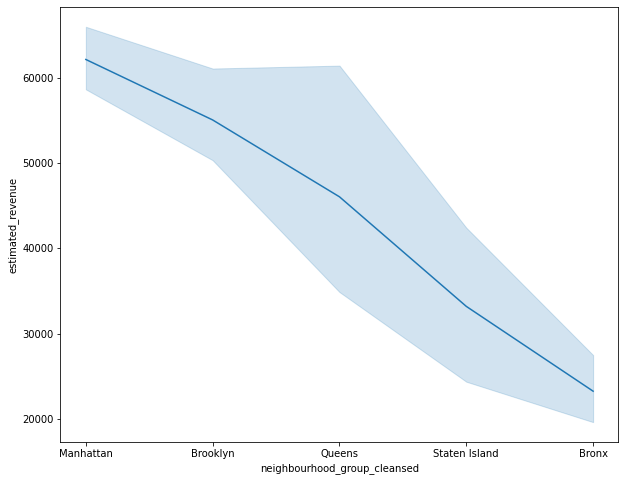

In [64]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=revenue_by_neigh, x='neighbourhood_group_cleansed', y='estimated_revenue');

### Understand "Plus" requirements. https://www.airbnb.com/help/article/2195/airbnb-plus-program-terms-and-conditions

### Spatial Analysis 

In [65]:
import warnings
warnings.filterwarnings("ignore") 

nbhoods = gpd.read_file('./data/neighbourhoods.geojson')
nbhoods.head()

neighbourhood neighbourhood_group  \
0         Bayswater              Queens   
1          Allerton               Bronx   
2       City Island               Bronx   
3  Ditmars Steinway              Queens   
4        Ozone Park              Queens   

                                            geometry  
0  MULTIPOLYGON (((-73.76671 40.61491, -73.76825 ...  
1  MULTIPOLYGON (((-73.84860 40.87167, -73.84582 ...  
2  MULTIPOLYGON (((-73.78282 40.84392, -73.78257 ...  
3  MULTIPOLYGON (((-73.90160 40.76777, -73.90391 ...  
4  MULTIPOLYGON (((-73.83754 40.69136, -73.83108 ...

In [66]:
df_latlong = df_listings[['listing_id', 'latitude', 'longitude']]
df_latlong.set_index('listing_id', inplace=True)
df_listings.drop(['latitude', 'longitude', 'neighbourhood'], axis=1, inplace=True)

df_listings= df_listings.rename(columns={'neighbourhood_group_cleansed':'neighbourhood_group',
                      'neighbourhood_cleansed': 'neighbourhood'})


In [67]:
df_latlong_combined = pd.merge(df_listings, df_latlong, how='inner', on='listing_id')
df_latlong_combined.head()

listing_id                        listing_url       scrape_id last_scraped  \
0        2595  https://www.airbnb.com/rooms/2595  20211204143024   2021-12-05   
1        3831  https://www.airbnb.com/rooms/3831  20211204143024   2021-12-05   
2        5121  https://www.airbnb.com/rooms/5121  20211204143024   2021-12-05   
3        5136  https://www.airbnb.com/rooms/5136  20211204143024   2021-12-05   
4        5178  https://www.airbnb.com/rooms/5178  20211204143024   2021-12-05   

                                                name  \
0                              Skylit Midtown Castle   
1  Whole flr w/private bdrm, bath & kitchen(pls r...   
2                                    BlissArtsSpace!   
3           Spacious Brooklyn Duplex, Patio + Garden   
4                   Large Furnished Room Near B'way　   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2  <b>The space</b><br />HELLO EVERYONE AND THANK...   
3  We welcome you to stay in our lovely 2 br dupl...   
4  Please don’t expect the luxury here just a bas...   

                               neighborhood_overview  \
0  Centrally located in the heart of Manhattan ju...   
1  Just the right mix of urban center and local n...   
2                                                NaN   
3                                                NaN   
4    Theater district, many restaurants around here.   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/f0813a11-40b2...     2845   
1  https://a0.muscache.com/pictures/e49999c2-9fd5...     4869   
2  https://a0.muscache.com/pictures/2090980c-b68e...     7356   
3  https://a0.muscache.com/pictures/miso/Hosting-...     7378   
4  https://a0.muscache.com/pictures/12065/f070997...     8967   

                                 host_url  ... instant_bookable  \
0  https://www.airbnb.com/users/show/2845  ...                f   
1  https://www.airbnb.com/users/show/4869  ...                f   
2  https://www.airbnb.com/users/show/7356  ...                f   
3  https://www.airbnb.com/users/show/7378  ...                f   
4  https://www.airbnb.com/users/show/8967  ...                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              3                                           3   
1                              1                                           1   
2                              2                                           0   
3                              1                                           1   
4                              1                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            2   
3                                            0   
4                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  \
0                                           0              0.33   
1                                           0              4.86   
2                                           0              0.52   
3                                           0              0.02   
4                                           0              3.68   

  host_active_days estimated_revenue  latitude longitude  
0           4965.0          216000.0  40.75356 -73.98559  
1           4876.0           30675.0  40.68494 -73.95765  
2           4818.0           90000.0  40.68535 -73.95512  
3           4818.0            2750.0  40.66265 -73.99454  
4           4790.0           68952.0  40.76457 -73.98317  

[5 rows x 74 columns]

In [68]:
# Create geodataframe 
df_geo = gpd.GeoDataFrame(df_latlong_combined, geometry=gpd.points_from_xy(df_latlong_combined.longitude, 
                                                                 df_latlong_combined.latitude))

# Columns for spatial analysis
cols = ['price', 'neighbourhood', 'neighbourhood_group', 'geometry']
df_geo = df_geo[cols]
df_geo.shape

(38243, 4)

In [69]:
df_geo.head()

price       neighbourhood neighbourhood_group                    geometry
0  150.0             Midtown           Manhattan  POINT (-73.98559 40.75356)
1   75.0  Bedford-Stuyvesant            Brooklyn  POINT (-73.95765 40.68494)
2   60.0  Bedford-Stuyvesant            Brooklyn  POINT (-73.95512 40.68535)
3  275.0         Sunset Park            Brooklyn  POINT (-73.99454 40.66265)
4   68.0             Midtown           Manhattan  POINT (-73.98317 40.76457)

In [70]:
df_geo.crs = CRS('epsg:2829')
df_geo.crs

<Projected CRS: EPSG:2829>
Name: NAD83(HARN) / New York Central
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - New York - counties of Broome; Cayuga; Chemung; Chenango; Cortland; Jefferson; Lewis; Madison; Oneida; Onondaga; Ontario; Oswego; Schuyler; Seneca; Steuben; Tioga; Tompkins; Wayne; Yates.
- bounds: (-77.75, 41.99, -75.04, 44.41)
Coordinate Operation:
- name: SPCS83 New York Central zone (meters)
- method: Transverse Mercator
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [71]:
#Set up epsg for neighbourhoods
nbhoods.crs = CRS('epsg:2829')
nbhoods.crs

<Projected CRS: EPSG:2829>
Name: NAD83(HARN) / New York Central
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - New York - counties of Broome; Cayuga; Chemung; Chenango; Cortland; Jefferson; Lewis; Madison; Oneida; Onondaga; Ontario; Oswego; Schuyler; Seneca; Steuben; Tioga; Tompkins; Wayne; Yates.
- bounds: (-77.75, 41.99, -75.04, 44.41)
Coordinate Operation:
- name: SPCS83 New York Central zone (meters)
- method: Transverse Mercator
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [72]:
df_geo_group = df_geo.groupby('neighbourhood')[['price']].median()

df_price_choropleth = pd.merge(nbhoods, df_geo_group,
                              left_on='neighbourhood', right_index=True)

df_price_choropleth.head()

neighbourhood neighbourhood_group  \
0      Bayswater              Queens   
22     Bayswater              Queens   
1       Allerton               Bronx   
2    City Island               Bronx   
44   City Island               Bronx   

                                             geometry  price  
0   MULTIPOLYGON (((-73.767 40.615, -73.768 40.615...   80.0  
22  MULTIPOLYGON (((-73.765 40.614, -73.765 40.613...   80.0  
1   MULTIPOLYGON (((-73.849 40.872, -73.846 40.870...   84.0  
2   MULTIPOLYGON (((-73.783 40.844, -73.783 40.843...  110.5  
44  MULTIPOLYGON (((-73.785 40.860, -73.785 40.859...  110.5

In [73]:
def plot_choropleth_neigh(neigh_name, ax, pos):
    
    if neigh_name == "all":
        ax = df_price_choropleth.plot(ax=ax, 
                                     figsize=(15,15), 
                                     column='price', 
                                     cmap='PuBu', 
                                     scheme='quantiles',
                                     edgecolor='aqua',
                                     legend=True, 
                                     legend_kwds = pos
                                    )
    else:
        ax = df_price_choropleth[df_price_choropleth.neighbourhood_group == neigh_name].plot(ax=ax, 
                                                                                            figsize=(10,8), 
                                                                                            column='price', 
                                                                                            cmap='PuBu', 
                                                                                            scheme='quantiles',   
                                                                                            edgecolor='aqua',
                                                                                            legend=True, 
                                                                                            legend_kwds = pos
                                                                                            )

    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    return ax

In [74]:
pos = {
    "all": {'loc':'upper left'},
    "Manhattan": {'loc':'upper left'},
    "Brooklyn": {'loc':'lower right'},
    "Bronx": {'loc':'upper right'},
    "Queens": {'loc':'lower left'},
    "Staten Island": {'loc':'lower right'}
}

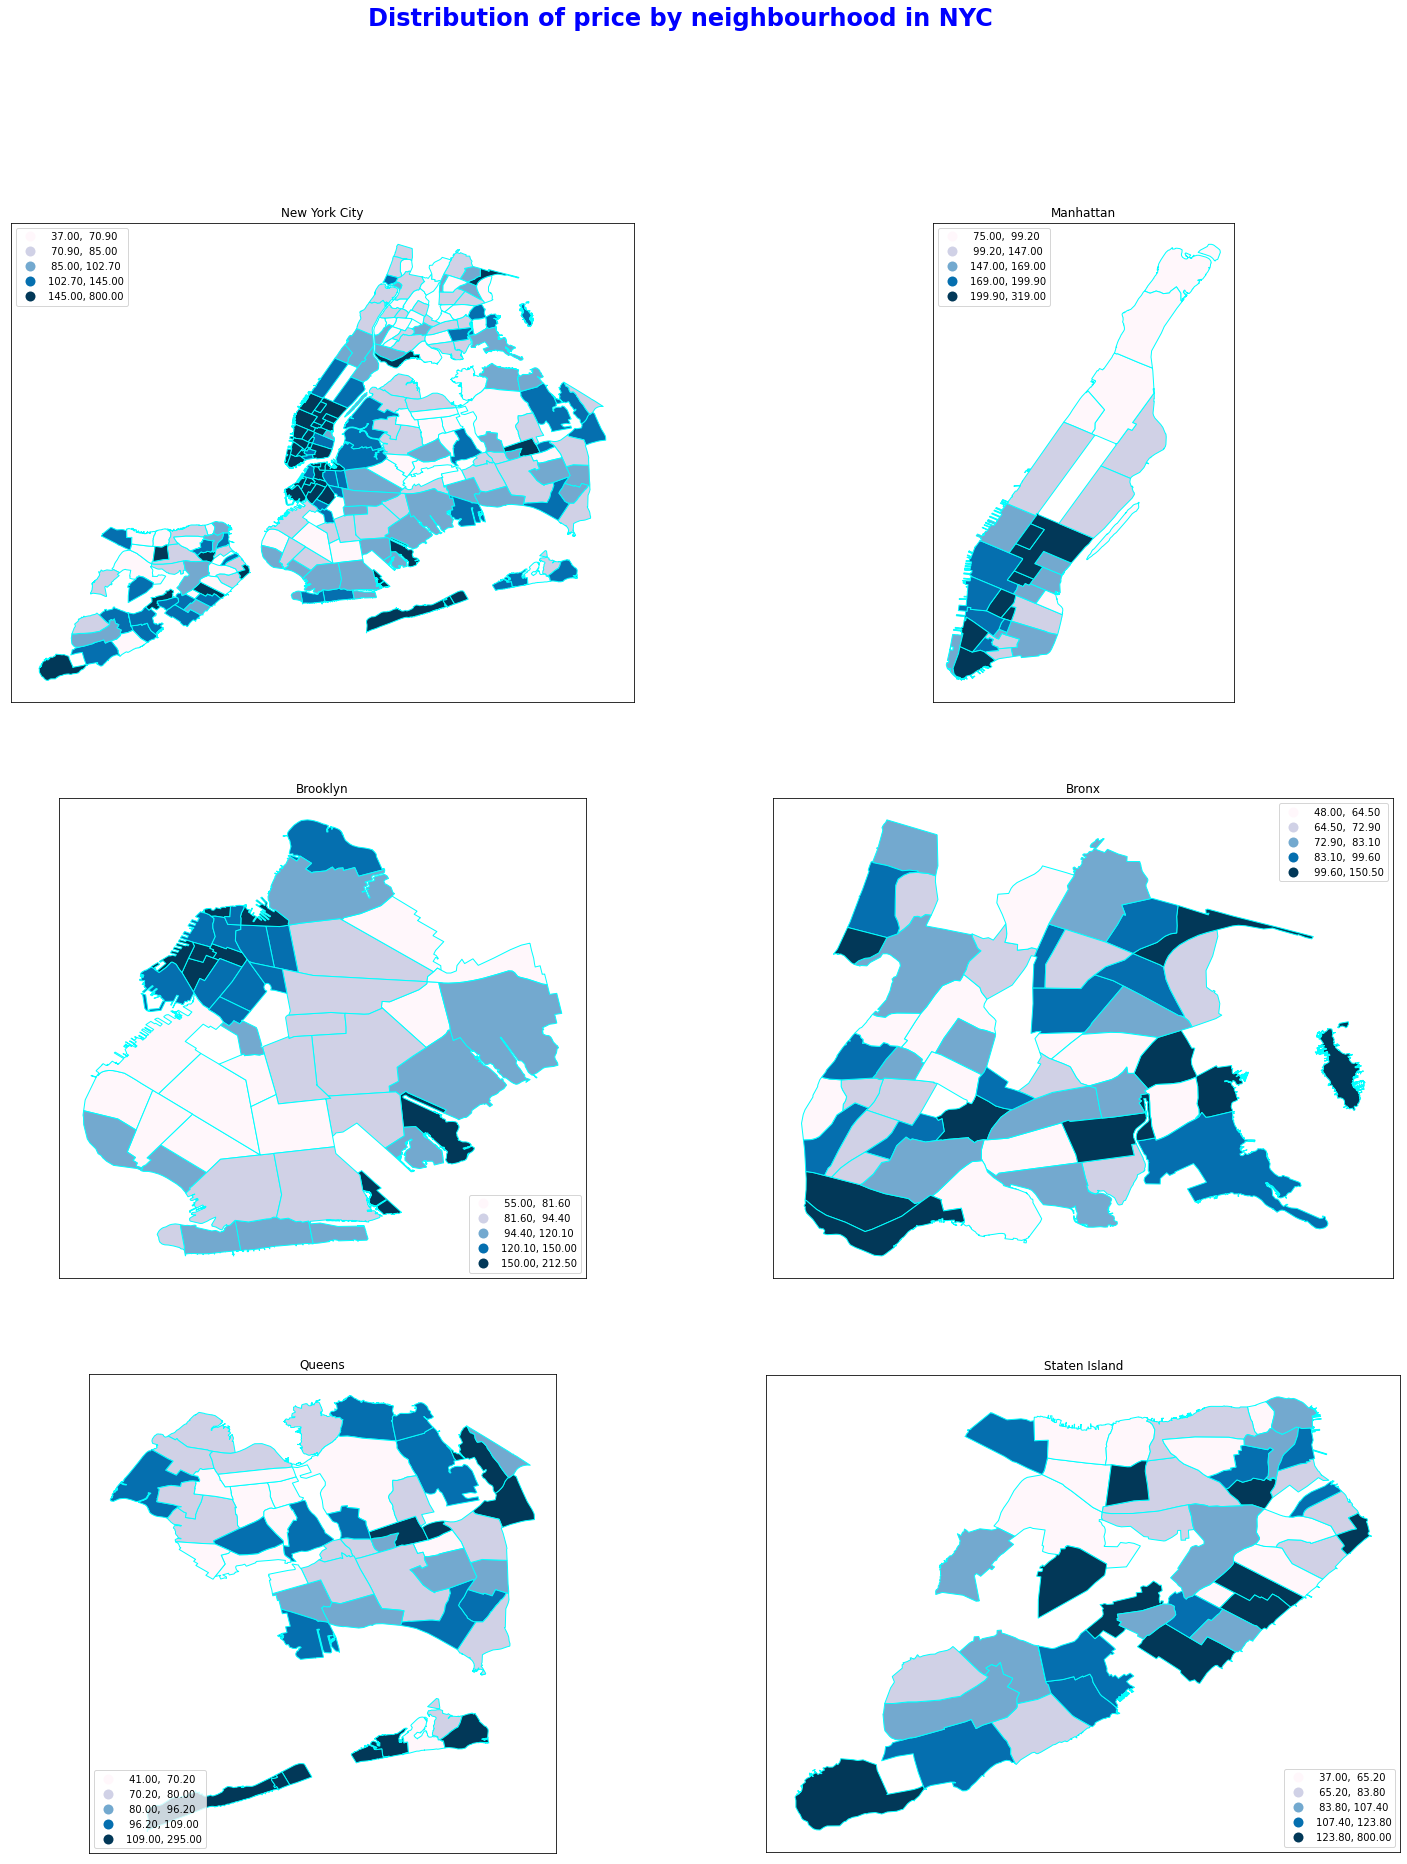

In [75]:
fig, axes = plt.subplots(3, 2)
fig.set_size_inches(25, 30)
axes[0,0] = plot_choropleth_neigh("all", axes[0,0], pos["all"])
axes[0,0].set_title("New York City")
axes[0,1] = plot_choropleth_neigh("Manhattan", axes[0,1], pos["Manhattan"])
axes[0,1].set_title("Manhattan")
axes[1,0] = plot_choropleth_neigh("Brooklyn", axes[1,0], pos["Brooklyn"])
axes[1,0].set_title("Brooklyn")
axes[1,1] = plot_choropleth_neigh("Bronx", axes[1,1], pos["Bronx"])
axes[1,1].set_title("Bronx")
axes[2,0] = plot_choropleth_neigh("Queens", axes[2,0], pos["Queens"])
axes[2,0].set_title("Queens")
axes[2,1] = plot_choropleth_neigh("Staten Island", axes[2,1], pos["Staten Island"])
axes[2,1].set_title("Staten Island")

plt.suptitle("Distribution of price by neighbourhood in NYC", 
             fontsize=24, fontweight='bold', color='Blue')

plt.show()

### Locate superhost

In [76]:
# Instantiate NYC map 
nyc_map = folium.Map(location=[df_latlong_combined['latitude'].mean(), df_latlong_combined['longitude'].mean()], zoom_start=12)

# Show superhost's location 
df_superhost = df_latlong_combined[df_latlong_combined.host_is_superhost == 't'] 
mc = MarkerCluster()
for row in df_superhost.itertuples():
    mc.add_child(folium.Marker(location=[row.latitude,  row.longitude],
                              popup='superhost'))
            
nyc_map.add_child(mc)
nyc_map

## Analysis (cont.)

### Property type
https://www.airbnb.com/resources/hosting-homes/a/how-to-define-what-kind-of-space-youre-hosting-361

https://www.airbnb.com/help/article/5/types-of-places-to-stayhttps://www.airbnb.com/help/article/5/types-of-places-to-stay


In [77]:
df_listings.property_type.replace({
    'Entire rental unit': 'Apartment',
    'Entire residential home': 'House',
    'Entire condominium (condo)': 'House',
    'Room in hotel': 'Boutique hotel',
    'Entire loft': 'Apartment',
    'Entire townhouse': 'House',
    'Room in boutqiue hotel': 'Boutique hotel',
    'Entire serviced apartment': 'Apartment',
    'Room in aparthotel': 'Apartment',
    'Private room in resort': 'Boutique hotel',
    'Entire bungalow': 'House',
    'Entire vacation home': 'House',
    'Entire cottage': 'House',
    'Entire villa': 'House',
    'Private room in bed and breakfast': 'Bed and breakfast',
    'Shared room in bed and breakfast': 'Bed and breakfast',
    'Room in bed and breakfast': 'Bed and breakfast',
    'Entire bed and breakfast': 'Bed and breakfast',
    'Room in resort': 'Boutique hotel',
    'Floor': 'Apartment',
    'Private room in earth house': 'Unique space',
    'Boat': 'Unique space',
    'Camper/RV': 'Unique space',
    'Houseboat': 'Unique space',
    'Barn': 'Unique space',
    'Private room in camper/rv': 'Unique space',
    'Cave': 'Unique space',
    'Private room in tent': 'Unique space',
    'Private room in barn': 'Unique space',
    'Bus': 'Unique space',
    'Lighthouse': 'Unique space',
    'Private room in train': 'Unique space',
    'Private room in lighthouse': 'Unique space',
    'Entire cabin': 'Unique space',
    'Castle': 'House',
    'Tent': 'Unique space',
    'Tower': 'Unique space',
}, inplace=True)

df_listings.loc[~df_listings.property_type.isin(['House', 'Apartment', 'Bed and breakfast', 'Boutique hotel', 'Unique space']), 'property_type'] = 'Secondary unit'

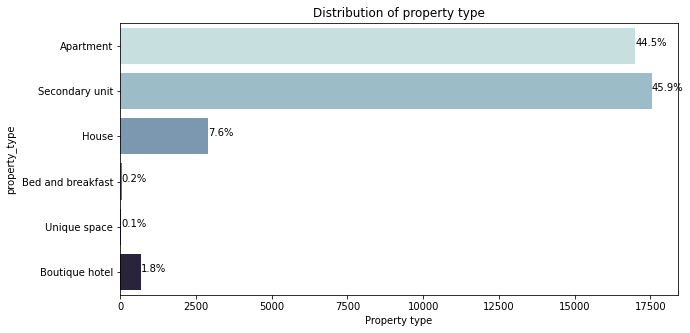

In [78]:
plt.figure(figsize=(10,5))
fig_property_type = sns.countplot(data=df_listings, y='property_type', palette='ch:start=.2,rot=-.3')
plt.title('Distribution of property type')
plt.xlabel('Property type')

total = len(df_listings['property_type'])
for p in fig_property_type.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        fig_property_type.annotate(percentage, (x, y))

plt.show()


### Room type

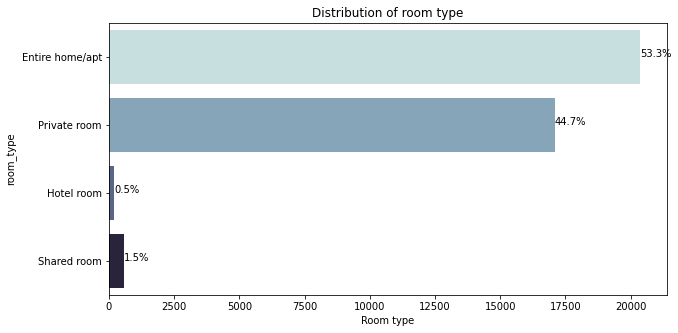

In [79]:
plt.figure(figsize=(10,5))
fig_room_type = sns.countplot(data=df_listings, y='room_type', palette='ch:start=.2,rot=-.3')
plt.title('Distribution of room type')
plt.xlabel('Room type')

total_room = len(df_listings['room_type'])
for ax in fig_room_type.patches:
        percentage = '{:.1f}%'.format(100 * ax.get_width()/total_room)
        x = ax.get_x() + ax.get_width() + 0.02
        y = ax.get_y() + ax.get_height()/2
        fig_room_type.annotate(percentage, (x, y))
plt.show()

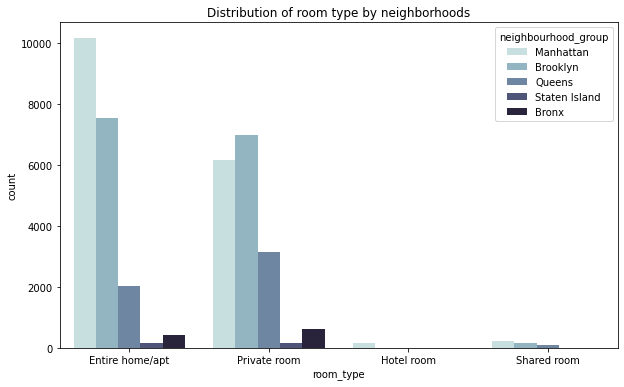

In [80]:
# Room type across neighborhoods
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type', hue = "neighbourhood_group", data = df_listings, palette='ch:start=.2,rot=-.3')
plt.title("Distribution of room type by neighborhoods")
plt.show()

### Amenities

In [81]:
df_listings.amenities[:1].values

array(['["Extra pillows and blankets", "Baking sheet", "Luggage dropoff allowed", "TV", "Hangers", "Ethernet connection", "Long term stays allowed", "Carbon monoxide alarm", "Wifi", "Heating", "Dishes and silverware", "Air conditioning", "Free street parking", "Essentials", "Hot water", "Bathtub", "Kitchen", "Fire extinguisher", "Cooking basics", "Dedicated workspace", "Hair dryer", "Stove", "Smoke alarm", "Keypad", "Iron", "Oven", "Paid parking off premises", "Refrigerator", "Bed linens", "Cleaning before checkout", "Coffee maker"]'],
      dtype=object)

In [82]:
amenities_list = list(df_listings.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('[', '')
amenities_list_string = amenities_list_string.replace(']', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]


### Top 10 amenities from the hosts

In [83]:
Counter(amenities_set).most_common(10)

[('Wifi', 36998),
 ('Long term stays allowed', 35045),
 ('Kitchen', 33982),
 ('Smoke alarm', 33772),
 ('Heating', 33079),
 ('Essentials', 33043),
 ('Air conditioning', 31276),
 ('Carbon monoxide alarm', 28530),
 ('Hangers', 28454),
 ('Hair dryer', 24068)]

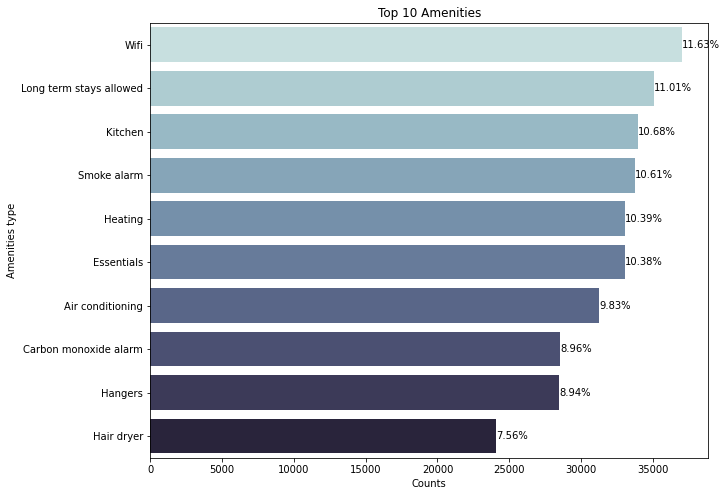

In [84]:
top_amenities = Counter(amenities_set).most_common()
top_10_amenities = top_amenities[:10]
sub_amenities = pd.DataFrame(top_10_amenities)
sub_amenities.rename(columns={0: 'Amenities', 1:'Counts'}, inplace=True)

plt.figure(figsize=(10,8))
fig_amenities = sns.barplot(y='Amenities', x='Counts', data=sub_amenities, palette='ch:start=.2,rot=-.3')
fig_amenities.set_title('Top 10 Amenities')
fig_amenities.set_ylabel('Amenities type')
fig_amenities.set_xlabel('Counts')

amenities_count_percent = sub_amenities.Counts.values / sum(sub_amenities.Counts.values) * 100
fig_amenities.bar_label(fig_amenities.containers[0], labels=[f'{x:.2f}%' for x in amenities_count_percent]);


In [85]:
df_listings.columns

Index(['listing_id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_group', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 

In [86]:
df = df_listings[['host_response_time', 'host_response_rate', 'host_acceptance_rate','host_is_superhost', 'host_listings_count', 
                'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
                'price', 'minimum_nights', 'review_scores_rating', 'review_scores_accuracy',
                'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]


In [96]:
df.dropna(subset=['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                'review_scores_communication', 'review_scores_location', 'review_scores_value'], inplace=True)
                
df.fillna(df[['beds', 'bedrooms']].mean(), inplace=True)
df = df.reset_index(drop=True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28132 entries, 0 to 28131
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           28132 non-null  object 
 1   host_response_rate           28132 non-null  object 
 2   host_acceptance_rate         28132 non-null  object 
 3   host_is_superhost            28132 non-null  object 
 4   host_listings_count          28132 non-null  float64
 5   property_type                28132 non-null  object 
 6   room_type                    28132 non-null  object 
 7   accommodates                 28132 non-null  int64  
 8   bedrooms                     28132 non-null  float64
 9   beds                         28132 non-null  float64
 10  price                        28132 non-null  float64
 11  minimum_nights               28132 non-null  int64  
 12  review_scores_rating         28132 non-null  float64
 13  review_scores_ac